<a href="https://colab.research.google.com/github/ezinneanne/DeepTechReady-Work/blob/new_branch/Week1_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

assignment 2

I've prepared an assignment for you The data set for this assignment is a house pricing data set which is similar to this session demo data.

The goal of this assignment is to build and compare two models on classification and regression.

You are to choose a classification and regression model that we have explored during the demo and another classification and regression model not explored in our demo.

An example for classification is using random forest classifier and an example of a regression model is support vector machine.

Do not fret as you can find these models and more about their documentation on the Sci-learn  website.

There are also relevant links that I've provided in the Jupiter notebook to see more of these models.
Finally you are required to evaluate the models in each category to determine which performs best for predicting the house price and the house price category.

Remember to upload your completed assignment to the learning portal.

The full assignment details and the deliverables you are required to submit will also be made available on the learning portal.
If you do encounter any challenges don't hesitate to reach out to a teaching assistant for supports You can also engage via Google Classroom for additional guidance and clarification.

In [ ]:
#model used in the demo
#linear regression for regression
#logistic regression for classification

#models not used in the demo
#randomforestclassifier for classification
#randomforestregressor for regression

In [ ]:
# Mounting gdrive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#importing libraries
import pandas as pd

In [ ]:
# Set parameters
DATA_DIR = '/content/drive/MyDrive/'


# Reading the dataset
data = pd.read_csv(DATA_DIR + 'nnigeria_houses.csv', encoding='latin1')
# display the first 5 rows
data.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,price Category
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000,1
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000,1
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000,1
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000,1
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedrooms        24326 non-null  float64
 1   bathrooms       24326 non-null  float64
 2   toilets         24326 non-null  float64
 3   parking_space   24326 non-null  float64
 4   title           24326 non-null  object 
 5   town            24326 non-null  object 
 6   state           24326 non-null  object 
 7   price           24326 non-null  int64  
 8   price Category  24326 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 1.7+ MB


In [ ]:
# Determine the percentage of missing value in each column
missing_percentage = data.isnull().sum() / len(data) * 100
missing_percentage

,0
bedrooms,0.0
bathrooms,0.0
toilets,0.0
parking_space,0.0
title,0.0
town,0.0
state,0.0
price,0.0
price Category,0.0


In [ ]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedrooms        24326 non-null  float64
 1   bathrooms       24326 non-null  float64
 2   toilets         24326 non-null  float64
 3   parking_space   24326 non-null  float64
 4   title           24326 non-null  object 
 5   town            24326 non-null  object 
 6   state           24326 non-null  object 
 7   price           24326 non-null  int64  
 8   price Category  24326 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 1.7+ MB


In [ ]:
# Encode categorical features
data_encoded = pd.get_dummies(data, columns=['title', 'town', 'state'], drop_first=True)

# Features and targets
features = data_encoded.drop(['price', 'price Category'], axis=1)
target_reg = data_encoded['price']
target_clf = data_encoded['price Category']

In [ ]:
from sklearn.model_selection import train_test_split

# Regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(features, target_reg, test_size=0.2, random_state=42)

# Classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(features, target_clf, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)
lr_preds = lr.predict(X_test_reg)

# Random Forest Regressor
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train_reg, y_train_reg)
rfr_preds = rfr.predict(X_test_reg)

# Evaluation
print("Linear Regression MSE:", mean_squared_error(y_test_reg, lr_preds))
print("Linear Regression R2:", r2_score(y_test_reg, lr_preds))

print("Random Forest Regressor MSE:", mean_squared_error(y_test_reg, rfr_preds))
print("Random Forest Regressor R2:", r2_score(y_test_reg, rfr_preds))

Linear Regression MSE: 4.449975400875295e+17
Linear Regression R2: -4.419904085838585
Random Forest Regressor MSE: 1.8173399824492465e+20
Random Forest Regressor R2: -2212.452324769497


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_clf, y_train_clf)
log_preds = logreg.predict(X_test_clf)

# Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_clf, y_train_clf)
rfc_preds = rfc.predict(X_test_clf)

# Evaluation
print("Logistic Regression Report:\n", classification_report(y_test_clf, log_preds))
print("Random Forest Classifier Report:\n", classification_report(y_test_clf, rfc_preds))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       1.00      1.00      1.00      4843

    accuracy                           1.00      4866
   macro avg       0.50      0.50      0.50      4866
weighted avg       0.99      1.00      0.99      4866

Random Forest Classifier Report:
               precision    recall  f1-score   support

           0       0.20      0.09      0.12        23
           1       1.00      1.00      1.00      4843

    accuracy                           0.99      4866
   macro avg       0.60      0.54      0.56      4866
weighted avg       0.99      0.99      0.99      4866



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


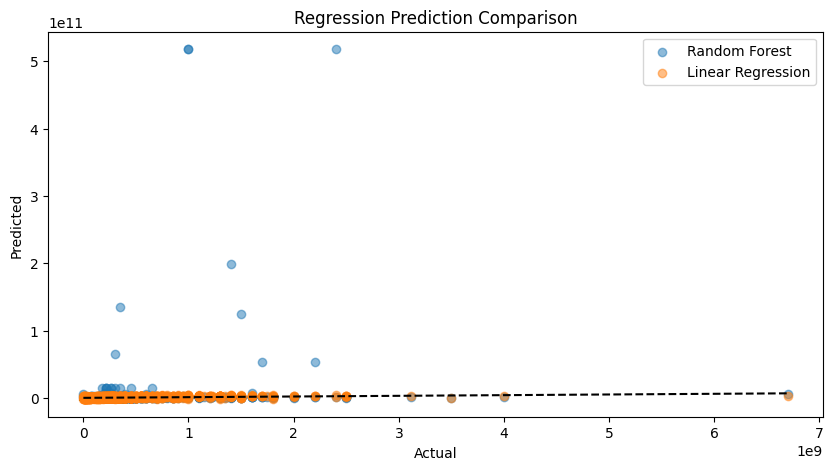

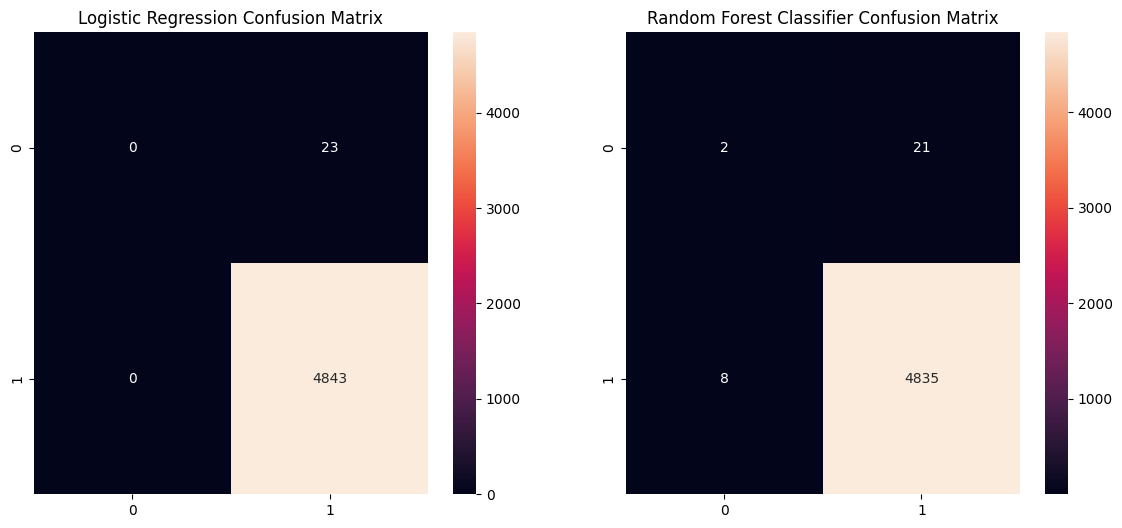

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Regression Prediction Comparison
plt.figure(figsize=(10, 5))
plt.scatter(y_test_reg, rfr_preds, alpha=0.5, label='Random Forest')
plt.scatter(y_test_reg, lr_preds, alpha=0.5, label='Linear Regression')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.title('Regression Prediction Comparison')
plt.show()

# Classification Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(confusion_matrix(y_test_clf, log_preds), annot=True, fmt='d', ax=ax[0])
ax[0].set_title("Logistic Regression Confusion Matrix")

sns.heatmap(confusion_matrix(y_test_clf, rfc_preds), annot=True, fmt='d', ax=ax[1])
ax[1].set_title("Random Forest Classifier Confusion Matrix")
plt.show()

In [ ]:
#importing libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
# Basic cleanup: Drop duplicates and rows with missing values
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13767 entries, 0 to 24324
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedrooms        13767 non-null  float64
 1   bathrooms       13767 non-null  float64
 2   toilets         13767 non-null  float64
 3   parking_space   13767 non-null  float64
 4   title           13767 non-null  object 
 5   town            13767 non-null  object 
 6   state           13767 non-null  object 
 7   price           13767 non-null  int64  
 8   price Category  13767 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 1.1+ MB


In [ ]:
# Define a function to calculate Z-scores and remove outliers
def remove_outliers_manual(data, column):
    # Calculate mean and standard deviation
    mean = data[column].mean()
    std_dev = data[column].std()

    # Calculate Z-scores manually
    z_scores = np.abs((data[column] - mean) / std_dev)

    # Filter the rows with Z-scores less than 3
    data_no_outliers = data[z_scores < 3]
    print(f"Number of outliers in data: {data_no_outliers}")

    return data_no_outliers


data = remove_outliers_manual(data, 'price')
data = remove_outliers_manual(data, 'price Category')
data
data.info()

Number of outliers in data:        bedrooms  bathrooms  toilets  parking_space                 title  \
0           6.0        5.0      5.0            4.0       Detached Duplex   
1           4.0        5.0      5.0            4.0     Terraced Duplexes   
2           4.0        5.0      5.0            4.0       Detached Duplex   
3           4.0        4.0      5.0            6.0       Detached Duplex   
4           4.0        4.0      5.0            2.0  Semi Detached Duplex   
...         ...        ...      ...            ...                   ...   
24319       8.0        8.0      9.0            4.0       Detached Duplex   
24320       3.0        4.0      4.0            5.0       Detached Duplex   
24321       2.0        2.0      2.0            4.0        Block of Flats   
24322       4.0        5.0      5.0            4.0        Block of Flats   
24324       3.0        4.0      4.0            3.0        Block of Flats   

                       town  state       price  price Categ

In [ ]:
data.columns

data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13767 entries, 0 to 13766
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedrooms        13767 non-null  float64
 1   bathrooms       13767 non-null  float64
 2   toilets         13767 non-null  float64
 3   parking_space   13767 non-null  float64
 4   title           13767 non-null  object 
 5   town            13767 non-null  object 
 6   state           13767 non-null  object 
 7   price           13767 non-null  int64  
 8   price Category  13767 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 968.1+ KB


In [ ]:
# Apply log transformation to price for regression stability
data['log_price'] = np.log1p(data['price'])

# Define features and target for regression
X_reg = data.drop(columns=['price', 'log_price', 'price Category'])
y_reg = data['log_price']

# Define features and target for classification
X_clf = data.drop(columns=['price', 'log_price', 'price Category'])
y_clf = data['price Category']

# Identify categorical and numerical features
categorical_features = ['title', 'town', 'state']
numerical_features = ['bedrooms', 'bathrooms', 'toilets', 'parking_space']

# Create preprocessing pipelines
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', StandardScaler(), numerical_features)
])

In [ ]:
# ----------------- Regression Models ------------------
# Linear Regression pipeline
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Random Forest Regressor pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [ ]:
# Train-test split for regression
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train models
lr_pipeline.fit(X_reg_train, y_reg_train)
rf_pipeline.fit(X_reg_train, y_reg_train)

# Predict and evaluate
lr_preds = lr_pipeline.predict(X_reg_test)
rf_preds = rf_pipeline.predict(X_reg_test)
lr_mse = mean_squared_error(y_reg_test, lr_preds)
lr_r2 = r2_score(y_reg_test, lr_preds)
rf_mse = mean_squared_error(y_reg_test, rf_preds)
rf_r2 = r2_score(y_reg_test, rf_preds)

In [ ]:
# ----------------- Classification Models ------------------
# Calculate class weights for logistic regression
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_clf), y=y_clf)
class_weight_dict = dict(zip(np.unique(y_clf), class_weights))

# Logistic Regression pipeline
log_clf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight=class_weight_dict))
])

# Random Forest Classifier pipeline
rf_clf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

In [ ]:
# Train-test split for classification
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Train models
log_clf_pipeline.fit(X_clf_train, y_clf_train)
rf_clf_pipeline.fit(X_clf_train, y_clf_train)

# Predict and evaluate
log_preds = log_clf_pipeline.predict(X_clf_test)
rf_preds = rf_clf_pipeline.predict(X_clf_test)
log_report = classification_report(y_clf_test, log_preds, output_dict=True)
rf_report = classification_report(y_clf_test, rf_preds, output_dict=True)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(1)